In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline

In [3]:
df = pd.read_csv('./data/CAR DETAILS FROM CAR DEKHO.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [6]:
df.shape

(4340, 8)

In [7]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [8]:
df['brand_name'] = df['name'].str.split(' ').str[0]

In [9]:
df.drop('name',axis=1,inplace=True)

In [10]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,2007,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,2007,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,2012,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai
3,2017,250000,46000,Petrol,Individual,Manual,First Owner,Datsun
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner,Honda


In [11]:
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [12]:
df['fuel'] = df['fuel'].map({'Petrol':0, 'Diesel':1, 'CNG':2, 'LPG':3, 'Electric':4})

In [13]:
df['fuel'].head()

0    0
1    0
2    1
3    0
4    1
Name: fuel, dtype: int64

In [14]:
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [15]:
df['owner'] = df['owner'].map({'First Owner':0, 'Second Owner':1, 'Third Owner':2, 'Fourth & Above Owner':3, 'Test Drive Car':4})

In [16]:
df['owner'].head()

0    0
1    0
2    0
3    0
4    1
Name: owner, dtype: int64

In [17]:
df['seller_type'].value_counts()

seller_type
Individual          3244
Dealer               994
Trustmark Dealer     102
Name: count, dtype: int64

In [18]:
df['seller_type'] = df['seller_type'].map({'Individual':0, "Dealer":1, "Trustmark Dealer":3})

In [19]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,2007,60000,70000,0,0,Manual,0,Maruti
1,2007,135000,50000,0,0,Manual,0,Maruti
2,2012,600000,100000,1,0,Manual,0,Hyundai
3,2017,250000,46000,0,0,Manual,0,Datsun
4,2014,450000,141000,1,0,Manual,1,Honda


In [20]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [21]:
df['transmission'] = df['transmission'].map({'Manual':0, 'Automatic':1})

In [22]:
df['brand_name'].unique()

array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
       'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
       'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
       'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
       'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object)

In [23]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner,brand_name
0,2007,60000,70000,0,0,0,0,Maruti
1,2007,135000,50000,0,0,0,0,Maruti
2,2012,600000,100000,1,0,0,0,Hyundai
3,2017,250000,46000,0,0,0,0,Datsun
4,2014,450000,141000,1,0,0,1,Honda


In [24]:
df.corr(numeric_only=True)

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
year,1.000000,0.413922,-0.419688,0.090388,0.178682,0.143800,-0.410448
selling_price,0.413922,1.000000,-0.192289,0.226883,0.230053,0.530205,-0.198833
km_driven,-0.419688,-0.192289,1.000000,0.274760,-0.179951,-0.120226,0.274409
fuel,0.090388,0.226883,0.274760,1.000000,0.005141,0.027507,0.015318
seller_type,0.178682,0.230053,-0.179951,0.005141,1.000000,0.178753,-0.199994
transmission,0.143800,0.530205,-0.120226,0.027507,0.178753,1.000000,-0.083924
owner,-0.410448,-0.198833,0.274409,0.015318,-0.199994,-0.083924,1.000000


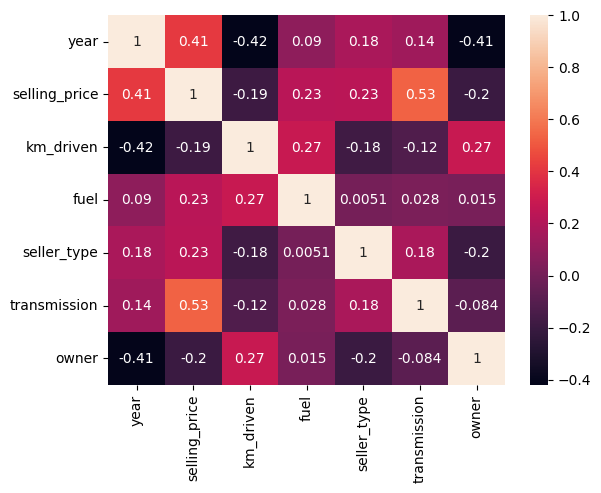

In [25]:
import seaborn as sns 

sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.show()

In [26]:
'''from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.col_name= le.fit_transform(df.col_name.values)'''

'from sklearn.preprocessing import LabelEncoder\nle = LabelEncoder()\ndf.col_name= le.fit_transform(df.col_name.values)'

In [27]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [28]:
data = ohe.fit_transform(df[['brand_name']])

In [29]:
final = pd.DataFrame(data.toarray(),columns=ohe.get_feature_names_out())

In [30]:
#data = ohe.fit_transform(df[['year']])

In [31]:
#final2 = pd.DataFrame(data.toarray(),columns=ohe.get_feature_names_out())

In [32]:
final_df = pd.concat([df,final],axis=1)

In [33]:
final_df.columns

Index(['year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'brand_name', 'brand_name_Ambassador',
       'brand_name_Audi', 'brand_name_BMW', 'brand_name_Chevrolet',
       'brand_name_Daewoo', 'brand_name_Datsun', 'brand_name_Fiat',
       'brand_name_Force', 'brand_name_Ford', 'brand_name_Honda',
       'brand_name_Hyundai', 'brand_name_Isuzu', 'brand_name_Jaguar',
       'brand_name_Jeep', 'brand_name_Kia', 'brand_name_Land', 'brand_name_MG',
       'brand_name_Mahindra', 'brand_name_Maruti', 'brand_name_Mercedes-Benz',
       'brand_name_Mitsubishi', 'brand_name_Nissan', 'brand_name_OpelCorsa',
       'brand_name_Renault', 'brand_name_Skoda', 'brand_name_Tata',
       'brand_name_Toyota', 'brand_name_Volkswagen', 'brand_name_Volvo'],
      dtype='object')

In [34]:
final_df.drop('brand_name',axis=1,inplace=True)
final_df.drop('owner',axis=1,inplace=True)
final_df.drop('km_driven',axis=1,inplace=True)
#final_df.drop('year',axis=1,inplace=True)

In [35]:
final_df.columns

Index(['year', 'selling_price', 'fuel', 'seller_type', 'transmission',
       'brand_name_Ambassador', 'brand_name_Audi', 'brand_name_BMW',
       'brand_name_Chevrolet', 'brand_name_Daewoo', 'brand_name_Datsun',
       'brand_name_Fiat', 'brand_name_Force', 'brand_name_Ford',
       'brand_name_Honda', 'brand_name_Hyundai', 'brand_name_Isuzu',
       'brand_name_Jaguar', 'brand_name_Jeep', 'brand_name_Kia',
       'brand_name_Land', 'brand_name_MG', 'brand_name_Mahindra',
       'brand_name_Maruti', 'brand_name_Mercedes-Benz',
       'brand_name_Mitsubishi', 'brand_name_Nissan', 'brand_name_OpelCorsa',
       'brand_name_Renault', 'brand_name_Skoda', 'brand_name_Tata',
       'brand_name_Toyota', 'brand_name_Volkswagen', 'brand_name_Volvo'],
      dtype='object')

In [36]:
X = final_df.drop('selling_price',axis=1)
y = final_df['selling_price']

In [37]:
X.head()

,year,fuel,seller_type,transmission,brand_name_Ambassador,brand_name_Audi,brand_name_BMW,brand_name_Chevrolet,brand_name_Daewoo,brand_name_Datsun,...,brand_name_Mercedes-Benz,brand_name_Mitsubishi,brand_name_Nissan,brand_name_OpelCorsa,brand_name_Renault,brand_name_Skoda,brand_name_Tata,brand_name_Toyota,brand_name_Volkswagen,brand_name_Volvo
0,2007,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2014,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size=0.30, random_state=42)

In [39]:
Xtrain.shape, Xtest.shape

((3038, 33), (1302, 33))

In [40]:
ytrain.shape, ytrain.shape

((3038,), (3038,))

In [41]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [42]:
model.fit(Xtrain,ytrain)

LinearRegression()

In [43]:
ypred = model.predict(Xtest)

In [44]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"Mean Squared Error: {mean_squared_error(ypred,ytest)}")
print(f"Mean Absolute Error: {mean_absolute_error(ypred,ytest)}")
print(f"R2 Score: {r2_score(ypred,ytest)}")

Mean Squared Error: 127110411266.31291
Mean Absolute Error: 185385.98614462337
R2 Score: 0.47660290252535253


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [46]:
scaled_data = scaler.fit_transform(Xtrain)

In [47]:
scaled_xtrain = pd.DataFrame(scaled_data,columns=scaler.get_feature_names_out())

In [48]:
scaled_data = scaler.transform(Xtest)

In [49]:
scaled_xtest = pd.DataFrame(scaled_data,columns=scaler.get_feature_names_out())

In [50]:
lr = LinearRegression()

In [51]:
lr.fit(scaled_xtrain,ytrain)

LinearRegression()

In [52]:
y_pred = lr.predict(scaled_xtest)

In [53]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

print(f"Mean Squared Error: {mean_squared_error(y_pred,ytest)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_pred,ytest)}")
print(f"R2 Score: {r2_score(y_pred,ytest)}")

Mean Squared Error: 7.034807166684996e+33
Mean Absolute Error: 3284207259365684.5
R2 Score: -0.001535590097220707
